In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import pandas as pd

gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('...')
sheet = wb.worksheet('...')
data = sheet.get_all_records()
df = pd.DataFrame(data)

In [ ]:
import numpy as np
l = np.array([item for sublist in [i.split() for i in data_words] for item in sublist])
len(l)

81183

In [ ]:
import gensim
from gensim.models import Phrases

data_words = df['prepro']
texts = [i.split() for i in data_words]

bigram = Phrases(texts)
trigram = Phrases(bigram[texts])
for idx in range(len(texts)):
    for token in bigram[texts[idx]]:
        if '_' in token:
            texts[idx].append(token)
    for token in trigram[texts[idx]]:
        if '_' in token:
            texts[idx].append(token)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


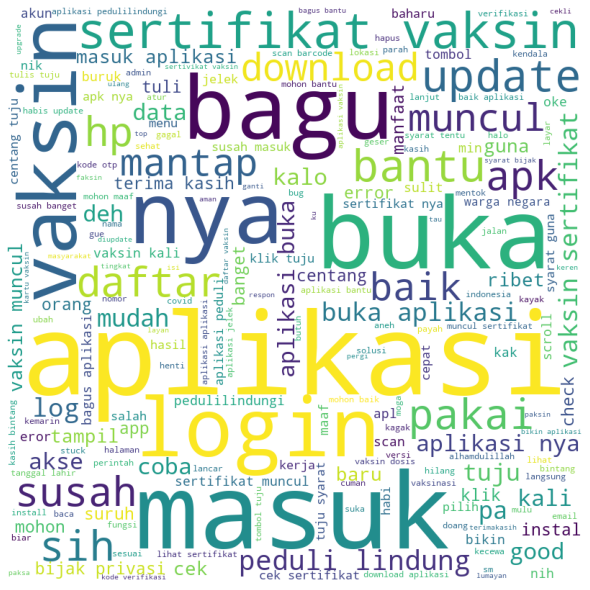

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(data_words.to_string())

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
import nltk
from nltk.probability import FreqDist

word_freq = nltk.FreqDist([item for sublist in [i.split() for i in data_words] for item in sublist])
word_freq.most_common(50)

[('aplikasi', 4180),
 ('vaksin', 2855),
 ('masuk', 1963),
 ('nya', 1832),
 ('sertifikat', 1695),
 ('buka', 1561),
 ('hp', 1100),
 ('login', 1016),
 ('tuju', 981),
 ('bagus', 968),
 ('muncul', 953),
 ('susah', 852),
 ('baik', 842),
 ('bantu', 799),
 ('pakai', 701),
 ('update', 699),
 ('apk', 650),
 ('mohon', 620),
 ('kali', 574),
 ('daftar', 572),
 ('kasih', 513),
 ('download', 512),
 ('sih', 508),
 ('syarat', 505),
 ('banget', 473),
 ('peduli', 466),
 ('lindung', 460),
 ('bijak', 425),
 ('bikin', 420),
 ('centang', 407),
 ('guna', 403),
 ('cek', 387),
 ('klik', 374),
 ('data', 363),
 ('pedulilindungi', 360),
 ('kalo', 359),
 ('orang', 353),
 ('pas', 352),
 ('terima', 351),
 ('coba', 348),
 ('tombol', 346),
 ('mudah', 343),
 ('scan', 332),
 ('baru', 324),
 ('check', 323),
 ('privasi', 321),
 ('nik', 321),
 ('tulis', 314),
 ('mantap', 310),
 ('pilih', 291)]

Maximum Coherence Value at topics 6


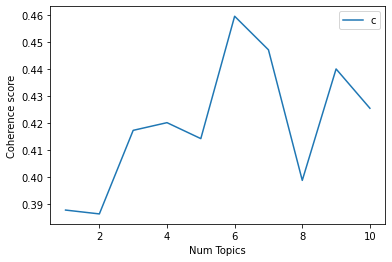

In [ ]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import models
from numpy import array
import matplotlib.pyplot as plt

id2word = corpora.Dictionary(texts)
corpus = [id2word.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

def compute_coherence_values(id2word, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values
  
start=1
limit=11
step=1
model_list, coherence_values = compute_coherence_values(id2word, corpus=corpus_tfidf, texts=texts, start=start, limit=limit, step=step)

# Print the coherence scores
x = range(start, limit, step)

max_cv = 0
max_m = 0
for m, cv in zip(x, coherence_values):
    if max_cv > cv:
      continue
    else :
      max_cv = cv
      max_m = m
print("Maximum Coherence Value at topics", max_m)

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
lda_model = LdaModel(corpus=corpus_tfidf, id2word=id2word, num_topics=max_m)
lda_model.save('/content/sample_data/lda.model')
lda_model.print_topics()

[(0,
  '0.017*"manfaat" + 0.010*"baik" + 0.009*"aplikasi" + 0.009*"masuk" + 0.009*"vaksin" + 0.009*"top" + 0.009*"vaksin_dosis" + 0.009*"tombol_tuju" + 0.009*"mohon_baik" + 0.008*"tuju_syarat"'),
 (1,
  '0.067*"buka" + 0.035*"peduli_lindung" + 0.030*"aplikasi" + 0.015*"lihat_sertifikat" + 0.013*"peduli" + 0.013*"lindung" + 0.013*"buruk" + 0.011*"apk" + 0.009*"nya" + 0.009*"vaksin"'),
 (2,
  '0.041*"vaksin" + 0.035*"sertifikat" + 0.021*"muncul" + 0.015*"nya" + 0.013*"aplikasi" + 0.013*"daftar" + 0.013*"oke" + 0.010*"kali" + 0.009*"cek" + 0.008*"jelek"'),
 (3,
  '0.067*"bantu" + 0.027*"susah" + 0.021*"bijak_privasi" + 0.013*"aplikasi" + 0.013*"log" + 0.013*"ribet" + 0.012*"tanggal_lahir" + 0.011*"masuk" + 0.010*"syarat_guna" + 0.008*"keren"'),
 (4,
  '0.035*"login" + 0.034*"masuk" + 0.015*"centang_tuju" + 0.014*"aplikasi" + 0.011*"scan_barcode" + 0.009*"pakai" + 0.008*"centang" + 0.007*"scan_qr" + 0.007*"scan" + 0.006*"nya"'),
 (5,
  '0.125*"bagus" + 0.057*"mantap" + 0.034*"good" + 0.031

In [ ]:
!pip install pyLDAvis==2.1.2
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.073928  0.100166       1        1  28.457365
0      0.038979 -0.005143       2        1  18.053387
1      0.048577  0.115751       3        1  15.319620
4      0.031353 -0.069833       4        1  13.461896
3      0.041934 -0.158027       5        1  12.845538
5     -0.234771  0.017086       6        1  11.862194, topic_info=               Term         Freq        Total Category  logprob  loglift
1             bagus  1574.000000  1574.000000  Default  30.0000  30.0000
21            bantu  1056.000000  1056.000000  Default  29.0000  29.0000
325          mantap   681.000000   681.000000  Default  28.0000  28.0000
97             buka  1414.000000  1414.000000  Default  27.0000  27.0000
109  peduli_lindung   590.000000   590.000000  Default  26.0000  26.0000
..              ...          ...          ...      ...      ...      ...
342       indonesia    43.668484   124.798443   Topic6  -5.5943   1.0817
68              nya    49.171084   881.456285   Topic6  -5.4757  -0.7545
219              no    34.079114    71.166299   Topic6  -5.8423   1.3955
43           vaksin    49.689574  1583.323744   Topic6  -5.4652  -1.3297
51           update    37.279371   295.725811   Topic6  -5.7525   0.0608

[361 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
887       1  0.020570    ah
887       2  0.020570    ah
887       3  0.925662    ah
887       4  0.020570    ah
887       6  0.020570    ah
...     ...       ...   ...
488       6  0.011621     x
2170      1  0.037667  zona
2170      2  0.037667  zona
2170      3  0.904013  zona
2170      4  0.037667  zona

[1417 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 5, 4, 6])

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=df['content'])

df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.6424,"bagus, mantap, good, terima_kasih, kasih, teri...",Aplikasi yg bagus
1,1,5.0,0.3926,"bagus, mantap, good, terima_kasih, kasih, teri...",Waw sangatt bagus
2,2,0.0,0.1667,"manfaat, baik, aplikasi, masuk, vaksin, top, v...",Baik
3,3,1.0,0.7495,"buka, peduli_lindung, aplikasi, lihat_sertifik...",Susah log in Tidak bisa digunakan anak smp Pad...
4,4,5.0,0.5833,"bagus, mantap, good, terima_kasih, kasih, teri...",Ol
5,5,0.0,0.1667,"manfaat, baik, aplikasi, masuk, vaksin, top, v...",👍👍👍👍👍👍
6,6,4.0,0.7745,"login, masuk, centang_tuju, aplikasi, scan_bar...","Ini koq gak bisa login masuk ya,habis klik WNI..."
7,7,3.0,0.5832,"bantu, susah, bijak_privasi, aplikasi, log, ri...",Sangat membantu
8,8,1.0,0.6095,"buka, peduli_lindung, aplikasi, lihat_sertifik...","Saya sudah pakai aplikasi ini yang pertama, Se..."
9,9,5.0,0.3819,"bagus, mantap, good, terima_kasih, kasih, teri...","Sertifikat vaksin kedua belum keluar, eh serti..."


In [ ]:
sheet_dominant_topic = wb.worksheet('...')
set_with_dataframe(sheet_dominant_topic, df_dominant_topic)

In [ ]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)
    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.8531,"manfaat, baik, aplikasi, masuk, vaksin, top, vaksin_dosis, tombol_tuju, mohon_baik, tuju_syarat","I dont know if i had a use for this kinda app. and also, Thank you for removing track.analytic.r..."
1,1.0,0.8184,"buka, peduli_lindung, aplikasi, lihat_sertifikat, peduli, lindung, buruk, apk, nya, vaksin","apk gk guna , bukannya mempermudah saat di upgrade .. malah bikin org susah , login enggak bisa²..."
2,2.0,0.8558,"vaksin, sertifikat, muncul, nya, aplikasi, daftar, oke, kali, cek, jelek",aplikasi ini sangat sangat buruk sekali. hanya mau mendaftar vaksinasi dengan aplikasi ini semua...
3,3.0,0.8164,"bantu, susah, bijak_privasi, aplikasi, log, ribet, tanggal_lahir, masuk, syarat_guna, keren","Aplikasi kurang canggih masa kebijakan privasi ga bisa di secrol gimana mau log in,tolong diperb..."
4,4.0,0.8193,"login, masuk, centang_tuju, aplikasi, scan_barcode, pakai, centang, scan_qr, scan, nya",In aplikasi bagaimana sih.... seharusnya aplikasi in bisa menyesuaikan di berbagai hp android ya...
5,5.0,0.8157,"bagus, mantap, good, terima_kasih, kasih, terima, aplikasi, warga_negara, error, banget","Aplikasi pedulilindungi yang pertama saya instal bisa berjalan dengan baik , tetapi setelah dita..."


In [ ]:
sheet_representative_text = wb.worksheet('...')
set_with_dataframe(sheet_representative_text, sent_topics_sorteddf_mallet)